In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets,layers,models

In [2]:
(x_train,y_train), (x_test,y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [4]:
cls = ["airplane",'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [14]:
def plot_sample(x,y,index):    
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(cls[y[index]])

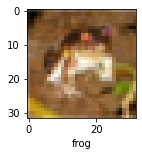

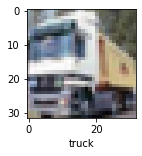

In [16]:
plot_sample(x_train,y_train,0)
plot_sample(x_train,y_train,1)

In [18]:
x_train = x_train/255
x_test =x_test/255

In [19]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [24]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid'),
    
])

ann.compile(optimizer='SGD',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
ann.fit(x_train,y_train,epochs= 5)


Epoch 1/5
1563/1563 [==============================] - 93s 59ms/step - loss: 1.8123 - accuracy: 0.3518
Epoch 2/5
1563/1563 [==============================] - 93s 59ms/step - loss: 1.6235 - accuracy: 0.4284
Epoch 3/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.5397 - accuracy: 0.4585
Epoch 4/5
1563/1563 [==============================] - 88s 56ms/step - loss: 1.4831 - accuracy: 0.4792
Epoch 5/5
1563/1563 [==============================] - 85s 54ms/step - loss: 1.4302 - accuracy: 0.4960


In [27]:
from sklearn.metrics import confusion_matrix,classification_report
yp = ann.predict(x_test)
y_pred = [np.argmax(element) for element in yp]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.48      0.54      1000
           1       0.63      0.57      0.60      1000
           2       0.48      0.14      0.22      1000
           3       0.36      0.19      0.25      1000
           4       0.45      0.39      0.41      1000
           5       0.39      0.43      0.41      1000
           6       0.45      0.67      0.54      1000
           7       0.45      0.65      0.53      1000
           8       0.59      0.62      0.60      1000
           9       0.44      0.69      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.46     10000
weighted avg       0.49      0.48      0.46     10000



In [31]:
cnn1 = models.Sequential([
    #cnn layer
    layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    #dense layer
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),
    
])

cnn1.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
cnn1.fit(x_train,y_train,epochs= 10)


Epoch 1/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.4991 - accuracy: 0.4675
Epoch 2/10
1563/1563 [==============================] - 25s 16ms/step - loss: 1.2043 - accuracy: 0.5775
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0947 - accuracy: 0.6193
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.0236 - accuracy: 0.6440
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9668 - accuracy: 0.6654
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9136 - accuracy: 0.6828
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8642 - accuracy: 0.6996
Epoch 8/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.8242 - accuracy: 0.7146
Epoch 9/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7859 - accuracy: 0.7272
Epoch 10/10
1563/1563 [==============================] - 25s 16m

In [32]:
cnn2 = models.Sequential([
    #cnn layer
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape = (32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    #dense layer
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax'),
    
])

cnn2.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
cnn2.fit(x_train,y_train,epochs= 10)


Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4871 - accuracy: 0.4667
Epoch 2/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.1409 - accuracy: 0.5988
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.0172 - accuracy: 0.6455
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9425 - accuracy: 0.6723
Epoch 5/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8762 - accuracy: 0.6943
Epoch 6/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8281 - accuracy: 0.7108
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7918 - accuracy: 0.7231
Epoch 8/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7491 - accuracy: 0.7380
Epoch 9/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7117 - accuracy: 0.7503
Epoch 10/10
1563/1563 [==============================] - 32s 21m

In [33]:
cnn1.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.0953 - accuracy: 0.6379


[1.095288634300232, 0.6378999948501587]

In [34]:
cnn2.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9610 - accuracy: 0.6807


[0.9610273241996765, 0.6807000041007996]

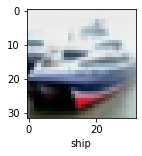

In [37]:
y_test = y_test.reshape(-1,)
plot_sample(x_test,y_test,1)

In [38]:
yp = cnn1.predict(x_test)
yp[:5]

array([[6.99965167e-04, 5.86429487e-05, 7.51200481e-04, 9.02353644e-01,
        1.51948968e-03, 9.70359799e-03, 4.26474214e-03, 6.68434586e-05,
        8.00756514e-02, 5.06254612e-04],
       [1.81890111e-02, 2.37972900e-01, 7.10285974e-07, 1.53318365e-06,
        1.83110231e-07, 1.09673759e-09, 2.28332686e-09, 1.23619506e-08,
        7.41755009e-01, 2.08059791e-03],
       [4.85526830e-01, 1.51886374e-01, 5.13785100e-03, 6.48195669e-03,
        8.79613683e-04, 1.38186340e-04, 2.95465834e-05, 2.99713179e-03,
        2.81218439e-01, 6.57041222e-02],
       [5.59247792e-01, 9.85381939e-03, 1.08956054e-01, 5.07848570e-03,
        2.59423740e-02, 4.59400326e-05, 1.92788728e-02, 4.23472156e-05,
        2.71195561e-01, 3.58770165e-04],
       [7.68985046e-06, 1.19823271e-04, 3.04617863e-02, 1.83833748e-01,
        3.31273168e-01, 5.99555112e-03, 4.48110014e-01, 2.93059329e-05,
        1.54205438e-04, 1.46084503e-05]], dtype=float32)

In [40]:
#index of max element
np.argmax([5,12,1,2])

1

In [46]:
np.argmax(yp[0])
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [43]:
y_pred = [np.argmax(element) for element in yp]
y_pred[:5]

[3, 8, 0, 0, 6]

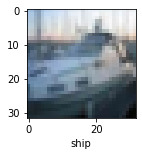

In [49]:
plot_sample(x_test,y_test,2)

In [50]:
cls[y_pred[2]]

'airplane'

In [51]:
from sklearn.metrics import confusion_matrix,classification_report
yp = cnn1.predict(x_test)
y_pred = [np.argmax(element) for element in yp]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.66      0.67      1000
           1       0.73      0.78      0.75      1000
           2       0.47      0.56      0.51      1000
           3       0.48      0.43      0.45      1000
           4       0.55      0.61      0.57      1000
           5       0.61      0.48      0.54      1000
           6       0.71      0.71      0.71      1000
           7       0.64      0.79      0.70      1000
           8       0.78      0.73      0.75      1000
           9       0.78      0.64      0.70      1000

    accuracy                           0.64     10000
   macro avg       0.64      0.64      0.64     10000
weighted avg       0.64      0.64      0.64     10000



In [52]:
from sklearn.metrics import confusion_matrix,classification_report
yp = cnn2.predict(x_test)
y_pred = [np.argmax(element) for element in yp]
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.72      1000
           1       0.79      0.82      0.81      1000
           2       0.60      0.51      0.55      1000
           3       0.54      0.46      0.49      1000
           4       0.56      0.71      0.63      1000
           5       0.66      0.47      0.55      1000
           6       0.64      0.86      0.73      1000
           7       0.81      0.65      0.72      1000
           8       0.75      0.85      0.80      1000
           9       0.79      0.74      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

